# Masters Thesis Figures

Example figures for Masters Thesis, particularly for Heating Functions section.

In [7]:
#import needed modules
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('bmh')
from matplotlib import ticker
import sys
import itertools
import xml.etree.ElementTree as ET
from imp import reload
%matplotlib inline
#ebtel modules
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
import ebtel_plot as ebp
reload(ebp)
reload(plt)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

In [8]:
#set some static parameters for formatting figures
mt_fs = 22.0
mt_figsize = (8,8*3/4)
mt_format = 'pdf'
mt_dpi = 1000
#set some default input parameters for our example cases
loop_length=40.0
alpha=1.5
species='electron'
tpulse=100.0
total_time = 8.0e+4
f_template = '/data/datadrive2/EBTEL-2fluid_runs/%s_heating_runs/alpha%s/config/ebtel_L%.1f_tn%s_tpulse100.0_%s/ebtel_L%.1f_tn%s_tpulse100.0_%s_0.xml'

In [9]:
#define some useful functions
def get_heating_function(t,t_start,t_end,amp,h_bg):
    heat = h_bg
    for i in range(len(t_start)):
        if t_start[i] <= t <= t_end[i]:
            t_mid = t_start[i] + (t_end[i] - t_start[i])/2.0
            if t < t_mid:
                heat = heat + amp[i]/((t_end[i]-t_start[i])/2.0)*(t - t_start[i])
            else:
                heat = heat - amp[i]/((t_end[i]-t_start[i])/2.0)*(t - t_end[i])
                
    return heat

def tick_maker(old_ticks,n):
    if n < 2:
        raise ValueError('n must be greater than 1')
        
    n = n-1
    delta = (old_ticks[-1] - old_ticks[0])/n
    new_ticks = []
    for i in range(n):
        new_ticks.append(old_ticks[0] + i*delta)
        
    new_ticks.append(old_ticks[0] + n*delta)
    return new_ticks

def my_formatter_2f(x,p):
    return "%.2f" % (x)

def my_formatter_1f(x,p):
    return "%.1f" % (x)

def calc_total_events(t_tot,t_pulse,t_n,N_tot):
    N_N = int(np.ceil(t_tot/(t_pulse+t_n)))
    N_MC = int(np.ceil(N_tot/N_N))
    return N_N,N_MC

def data_loader(species,alpha,loop_length,t_wait,tot_events):
    tot_event_list = []
    file_format = '/data/datadrive2/EBTEL-2fluid_runs/%s_heating_runs/alpha%s/data/ebtel_L%.1f_tn%d_tpulse100.0_rka4/ebtel_L%.1f_tn%d_tpulse100.0_rka4_%d_heat_amp.txt'
    for i in range(tot_events):
        temp = np.loadtxt(file_format%(species,str(alpha),loop_length,t_wait,loop_length,t_wait,i))
        tot_event_list.append(temp)
    #flatten list
    tot_event_list = list(itertools.chain(*tot_event_list))
    return tot_event_list

## Event Amplitude Histogram

Build histogram of event amplitudes for example values of $\alpha,L,T_N$. Really only need one as they all should look about the same.

In [10]:
plotter = ebp.Plotter(dpi=mt_dpi,format=mt_format,figsize=mt_figsize,fs=mt_fs)

No file specified. Variable namespace will not be populated.


In [11]:
plotter.events = data_loader(species,alpha,loop_length,5000,calc_total_events(total_time,tpulse,5000,1e+4)[1])

In [12]:
plotter.plot_event_distribution(print_fig_filename='../masters_thesis_figs/event_dist')

(-1.5759555567172034, 0.080641361266988537)

## Example Heating Function Profiles

Next, we'll provide examples of uniform amplitudes ($T_N=750,5000$ s), power-law($T_N=2000$ s) and scaling($b=1,2$ $T_N=2000$ s).

In [13]:
#read the xml file for alpha=uniform, tn=750,5000 to get the start times and amplitudes
tree = ET.parse(f_template%(species,'uniform',loop_length,'1000','euler',loop_length,'1000','euler'))
root = tree.getroot()

In [14]:
#get amplitude, start and end times
h0 = np.float(root.find('h_nano').text)
st_array = []
et_array = []
for child in root.find('start_time_array'):
    st_array.append(np.float(child.text))
for child in root.find('end_time_array'):
    et_array.append(np.float(child.text))
st_array = np.array(st_array)
et_array = np.array(et_array)
amp_array = h0*np.ones(len(st_array))

In [15]:
#make heating function
t=np.arange(0,total_time)
heat_750_uni = np.zeros(len(t))
for i in range(len(t)):
    heat_750_uni[i] = get_heating_function(t[i],st_array,et_array,amp_array,3.4e-6)

In [16]:
#similarly for tn=5000 s
tree = ET.parse(f_template%(species,'uniform',loop_length,'5000','euler',loop_length,'5000','euler'))
root = tree.getroot()
#get amplitude, start and end times
h0 = np.float(root.find('h_nano').text)
st_array = []
et_array = []
for child in root.find('start_time_array'):
    st_array.append(np.float(child.text))
for child in root.find('end_time_array'):
    et_array.append(np.float(child.text))
st_array = np.array(st_array)
et_array = np.array(et_array)
amp_array = h0*np.ones(len(st_array))
#make heating function
heat_5000_uni = np.zeros(len(t))
for i in range(len(t)):
    heat_5000_uni[i] = get_heating_function(t[i],st_array,et_array,amp_array,3.4e-6)

In [17]:
#now do the same for the two scaling power-law cases but heating amplitudes can be loaded in

In [18]:
tree = ET.parse(f_template%(species,alpha,loop_length,'2000-b1.0','rka4',loop_length,'2000-b1.0','rka4'))
root = tree.getroot()
amp_array = []
st_array = []
et_array = []
for child in root.find('amp_array'):
    amp_array.append(np.float(child.text))
amp_array = np.array(amp_array)
for child in root.find('start_time_array'):
    st_array.append(np.float(child.text))
at_array = np.array(st_array)
for child in root.find('end_time_array'):
    et_array.append(np.float(child.text))
et_array = np.array(et_array)

In [19]:
heat_b1_pl = np.zeros(len(t))
for i in range(len(t)):
    heat_b1_pl[i] = get_heating_function(t[i],st_array,et_array,amp_array,3.4e-6)

In [20]:
tree = ET.parse(f_template%(species,alpha,loop_length,'2000-b2.0','rka4',loop_length,'2000-b2.0','rka4'))
root = tree.getroot()
amp_array = []
st_array = []
et_array = []
for child in root.find('amp_array'):
    amp_array.append(np.float(child.text))
amp_array = np.array(amp_array)
for child in root.find('start_time_array'):
    st_array.append(np.float(child.text))
at_array = np.array(st_array)
for child in root.find('end_time_array'):
    et_array.append(np.float(child.text))
et_array = np.array(et_array)

In [21]:
heat_b2_pl = np.zeros(len(t))
for i in range(len(t)):
    heat_b2_pl[i] = get_heating_function(t[i],st_array,et_array,amp_array,3.4e-6)

In [22]:
#for the no wait-time case, we can just load in the amplitude data from the text file
amp_array = np.loadtxt('/data/datadrive2/EBTEL-2fluid_runs/electron_heating_runs/alpha1.5/data/ebtel_L40.0_tn2000_tpulse100.0_rka4/ebtel_L40.0_tn2000_tpulse100.0_rka4_0_heat_amp.txt')

In [23]:
#load the start and end times normally
tree = ET.parse(f_template%(species,alpha,loop_length,'2000','rka4',loop_length,'2000','rka4'))
root = tree.getroot()
st_array = []
et_array = []
for child in root.find('start_time_array'):
    st_array.append(np.float(child.text))
at_array = np.array(st_array)
for child in root.find('end_time_array'):
    et_array.append(np.float(child.text))
et_array = np.array(et_array)

In [24]:
heat_pl = np.zeros(len(t))
for i in range(len(t)):
    heat_pl[i] = get_heating_function(t[i],st_array,et_array,amp_array,3.4e-6)

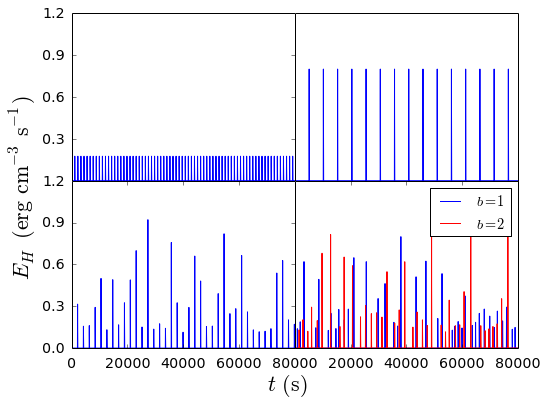

In [35]:
#plot the results
fig,axes = plt.subplots(2,2,figsize=mt_figsize,sharex=False,sharey=False)
plt.subplots_adjust(hspace=0,wspace=0)
#plot
axes[0,1].plot(t,heat_5000_uni)
axes[0,0].plot(t,heat_750_uni)
axes[1,0].plot(t,heat_pl)
axes[1,1].plot(t,heat_b1_pl,'b',label=r'$b=1$')
axes[1,1].plot(t,heat_b2_pl,'r',label=r'$b=2$')
#cosmetic
#fontsize
axes[0,0].tick_params(axis='both',labelsize=0.65*mt_fs,pad=8)
axes[0,1].tick_params(axis='both',labelsize=0.65*mt_fs,pad=8)
axes[1,0].tick_params(axis='both',labelsize=0.65*mt_fs,pad=8)
axes[1,1].tick_params(axis='both',labelsize=0.65*mt_fs,pad=8)
#set intervals
for i in range(2):
    for j in range(2):
        axes[i,j].set_ylim([0,1.2])
        axes[i,j].set_xticks(tick_maker(axes[i,j].get_xticks(),5))
        axes[i,j].set_yticks(tick_maker(axes[i,j].get_yticks(),5))
#prune and turn off visibility
axes[0,0].set_yticks(axes[0,0].get_yticks()[1:])
axes[0,0].set_xticks([])
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[1,1].set_yticks([])
axes[1,1].set_xticks(axes[1,1].get_xticks()[1:])
#labels
fig.text(0.5, 0.04, r'$t$ $\mathrm{(s)}$', ha='center', va='center',fontsize=mt_fs)
fig.text(0.04, 0.5, r'$E_H$ $(\mathrm{erg}$ $\mathrm{cm}^{-3}$ $\mathrm{s}^{-1}\mathrm{)}$', ha='center', va='center', rotation='vertical',fontsize=mt_fs)
axes[1,1].legend(fontsize=0.65*mt_fs,frameon=True)
plt.savefig('/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/heating_functions.'+mt_format,format=mt_format,dpi=mt_dpi)